## SMS spam classification 

Data source: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

In [41]:
from nltk.tokenize import word_tokenize
import en_core_web_sm
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [42]:
colnames=['label', 'sms']
filepath = '/Users/RodolfoSaldanha/Downloads/smsspamcollection/SMSSpamCollection.txt'

data = pd.read_csv(filepath, sep="\t", header=None, names=colnames)
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Preprocessing

In [43]:
le = LabelEncoder() 
  
data['target']= le.fit_transform(data['label']) 

In [48]:
sentences = data['sms'].values
y = data['target'].values

#### Logistic Regression

In [49]:
clf = Pipeline([('vect', CountVectorizer()), ('classifier', LogisticRegression())])

scores = cross_val_score(clf, sentences, y, cv=6, scoring='accuracy')
print('Cross-validation Accuracy:',scores, 'Average:',scores.mean())

predictions = cross_val_predict(clf, sentences, y, cv=6)
accuracy = metrics.accuracy_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

/Users/RodolfoSaldanha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation Accuracy: [0.9827957  0.98277718 0.98600646 0.98060345 0.98168103 0.98491379] Average: 0.9831296021845959


/Users/RodolfoSaldanha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-Predicted Accuracy: 0.9831299353912419


#### Deep Neural Network

In [109]:
def create_model(X_train):
    input_dim = X_train.shape[1]  # Number of features

    model = Sequential()
    model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [128]:
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

model = create_model(X_train)

history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 4457 samples, validate on 1115 samples
Epoch 1/100
4457/4457 [==============================] - 4s 936us/step - loss: 0.2737 - acc: 0.9479 - val_loss: 0.0994 - val_acc: 0.9803
Epoch 2/100
4457/4457 [==============================] - 2s 428us/step - loss: 0.0594 - acc: 0.9912 - val_loss: 0.0635 - val_acc: 0.9839
Epoch 3/100
4457/4457 [==============================] - 2s 453us/step - loss: 0.0262 - acc: 0.9953 - val_loss: 0.0564 - val_acc: 0.9839
Epoch 4/100
4457/4457 [==============================] - 2s 437us/step - loss: 0.0136 - acc: 0.9984 - val_loss: 0.0574 - val_acc: 0.9848
Epoch 5/100
4457/4457 [==============================] - 2s 542us/step - loss: 0.0077 - acc: 0.9996 - val_loss: 0.0602 - val_acc: 0.9848
Epoch 6/100
4457/4457 [==============================] - 2s 524us/step - loss: 0.0050 - acc: 0.9998 - val_loss: 0.0645 - val_acc: 0.9848
Epoch 7/100
4457/4457 [==============================] - 2s 488us/step - loss: 0.0035 - acc: 0.9998 - val_loss: 0.0657 - val_acc: 

Epoch 59/100
4457/4457 [==============================] - 2s 559us/step - loss: 1.3846e-06 - acc: 1.0000 - val_loss: 0.1721 - val_acc: 0.9839
Epoch 60/100
4457/4457 [==============================] - 2s 417us/step - loss: 1.2179e-06 - acc: 1.0000 - val_loss: 0.1728 - val_acc: 0.9839
Epoch 61/100
4457/4457 [==============================] - 2s 422us/step - loss: 1.0827e-06 - acc: 1.0000 - val_loss: 0.1743 - val_acc: 0.9839
Epoch 62/100
4457/4457 [==============================] - 2s 423us/step - loss: 9.6612e-07 - acc: 1.0000 - val_loss: 0.1750 - val_acc: 0.9839
Epoch 63/100
4457/4457 [==============================] - 2s 410us/step - loss: 8.7501e-07 - acc: 1.0000 - val_loss: 0.1754 - val_acc: 0.9839
Epoch 64/100
4457/4457 [==============================] - 2s 417us/step - loss: 7.7034e-07 - acc: 1.0000 - val_loss: 0.1758 - val_acc: 0.9839
Epoch 65/100
4457/4457 [==============================] - 2s 454us/step - loss: 6.7728e-07 - acc: 1.0000 - val_loss: 0.1775 - val_acc: 0.9839
Epoch 

In [129]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9830


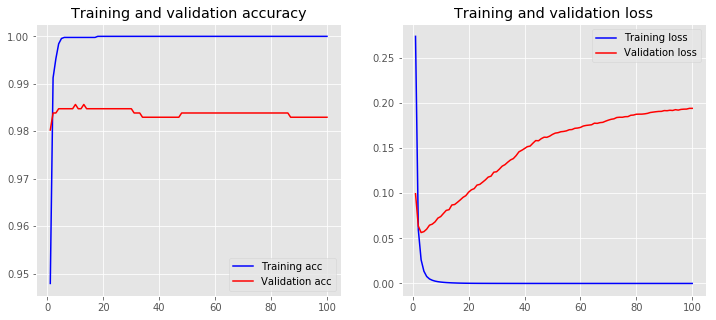

In [130]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [133]:
predictions = model.predict(X_test)
predictions = [ int(x) for x in predictions ]
accuracy = metrics.accuracy_score(y_test, predictions)
print('Prediction Accuracy:', accuracy)

Prediction Accuracy: 0.968609865470852


#### Conclusion

The model is overfitting since the validation loss is increasing. Based on the graph, only a epochs are necessary to achieve similar results, probably about 10 is enough.

Anyway, logistic regression is a simpler model, but it reaches a higher accuracy for this problem.